In [20]:
import pandas as pd

pd.set_option('display.max_colwidth', -1)

import numpy as np
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib notebook

Data_Path = 'Data_Footprints_2018-06-12.csv'
Data = pd.read_csv(Data_Path)
Data = Data.set_index(pd.DatetimeIndex(Data.datetime))

Data['fch4']*=1000


aliases={'wind_speed':'$\overline{U}$','PPFD_Avg':'PPFD',
        'AirTC_Avg':'T$_{a}$','Out_of_Basin':'F$_{out}$',
        'Sedge':'F$_{sdg}$','air_pressure':'P$_{a}$',
        'Shrub':'F$_{shb}$','Temp':'T$_{s}$'}
def Read(var,aliases):
    Filling_Path = 'GapFilled'+var+'.csv'
    Filling = pd.read_csv(Filling_Path)
    Filling = Filling.set_index(pd.DatetimeIndex(Filling.datetime))
    Summary_Path = 'GapFillingSummary'+var+'.csv'
    Summary = pd.read_csv(Summary_Path).drop('Unnamed: 0',axis=1)
    Summary['Lower_Bounds'] = Summary['MSE']-Summary['CI']
    Summary['Name']=''
    for Model in Summary['Model']:
        try:
            Summary.loc[Summary['Model']==Model,'Name']=aliases[Model]
        except:
            Summary.loc[Summary['Model']==Model,'Name']=Model
            pass
#             Summary.loc[Summary['Model']==Model,'Name']=Model.split('+')[-1]
    return(Filling,Summary)
fco2_fill,fco2_summary = Read('fco2',aliases)
fch4_fill,fch4_summary = Read('fch4',aliases)




# print('Paramters fed to model:')
# print()
# print(Summary.loc[Summary['Level']==Summary['Level'].max()]['Model'].values[0].replace('+',', '))

sizes = (6.5,6.5)
fco2_summary

,Best,CI,Key,Level,MSE,Model,SE,STD,Lower_Bounds,Name
0,N,0.018416,4_0,4,0.145474,PPFD_Avg+AirTC_Avg+Shrub+VPD,0.008639,0.019316,0.127058,PPFD_Avg+AirTC_Avg+Shrub+VPD
1,Y,0.019210,1_0,1,0.147185,PPFD_Avg,0.009011,0.020149,0.127975,PPFD
2,N,0.081019,1_1,1,0.954911,AirTC_Avg,0.038004,0.084980,0.873892,T$_{a}$
3,N,0.129670,1_2,1,1.035028,Shrub,0.060825,0.136009,0.905358,F$_{shb}$
4,N,0.066015,1_3,1,0.777334,VPD,0.030966,0.069242,0.711319,VPD
5,Y,0.014882,2_0,2,0.150622,PPFD_Avg+AirTC_Avg,0.006981,0.015610,0.135739,PPFD_Avg+AirTC_Avg
6,Y,0.020612,2_1,2,0.147752,PPFD_Avg+Shrub,0.009669,0.021620,0.127140,PPFD_Avg+Shrub
7,Y,0.012312,2_2,2,0.146097,PPFD_Avg+VPD,0.005775,0.012914,0.133785,PPFD_Avg+VPD
8,Y,0.010375,3_0,3,0.137376,PPFD_Avg+AirTC_Avg+VPD,0.004867,0.010883,0.127000,PPFD_Avg+AirTC_Avg+VPD
9,Y,0.013587,3_1,3,0.146908,PPFD_Avg+Shrub+VPD,0.006373,0.014251,0.133321,PPFD_Avg+Shrub+VPD


# Performance at Level 1

<IPython.core.display.Javascript object>


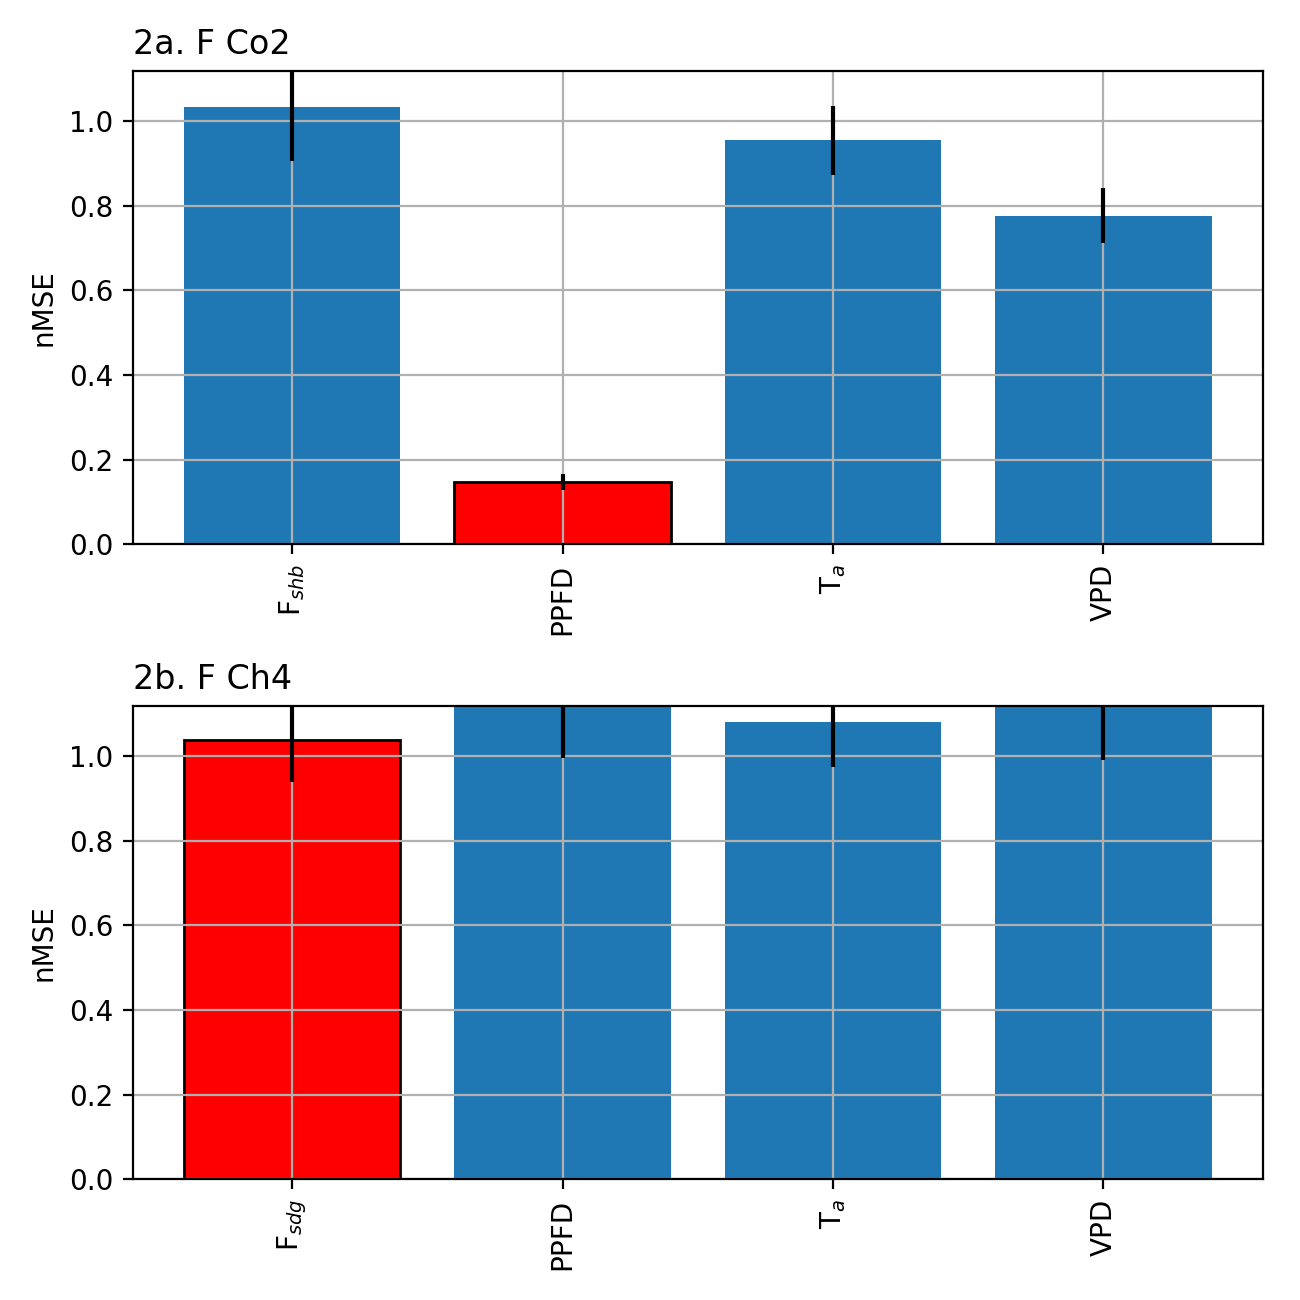

   Key      Model       MSE
1  1_0  PPFD_Avg   0.147185
2  1_1  AirTC_Avg  0.954911
3  1_2  Shrub      1.035028
4  1_3  VPD        0.777334
   Key      Model       MSE
1  1_0  PPFD_Avg   1.133538
2  1_1  AirTC_Avg  1.082144
3  1_2  Sedge      1.037806
4  1_3  VPD        1.122710


In [21]:
fig,ax = plt.subplots(2,1,figsize=sizes)
def Level_Plot(ax,l,Summary,title,yl):
    Sub = Summary.loc[Summary['Level']==l,['Key','Name','Model','MSE','CI','Upper_Bounds']]
    if l ==1:
        ax.bar(Sub['Name'],Sub['MSE'],yerr=Sub['CI'])
    else:
        ax.bar(Sub['Key'],Sub['MSE'],yerr=Sub['CI'])
    ax.grid()
    ax.set_ylabel('nMSE')
    plt.sca(ax)
    plt.xticks(rotation=90)
    ax.set_ylim(0,yl)
    ax.set_title(title,loc='left')
    Parsimony = Sub.loc[Sub['MSE'] == Sub['MSE'].min()]
    ax.bar(Parsimony['Name'],Parsimony['MSE'],facecolor='red',edgecolor='black')
    print(Sub[['Key','Model','MSE']])

Fignum = '2'
Level = 1
Level_Plot(ax[0],Level,fco2_summary,Fignum+'a. F Co2',1.12)
Level_Plot(ax[1],Level,fch4_summary,Fignum+'b. F Ch4',1.12)
plt.sca(ax[0])
# if Level == 1:
#     plt.xticks(rotation=90,visible=False)
# plt.suptitle('Single Factor Models')
# from pandas.tools.plotting import table
plt.tight_layout()
plt.savefig('Fig'+Fignum+'.png')

# Best performer at each factor level

<IPython.core.display.Javascript object>


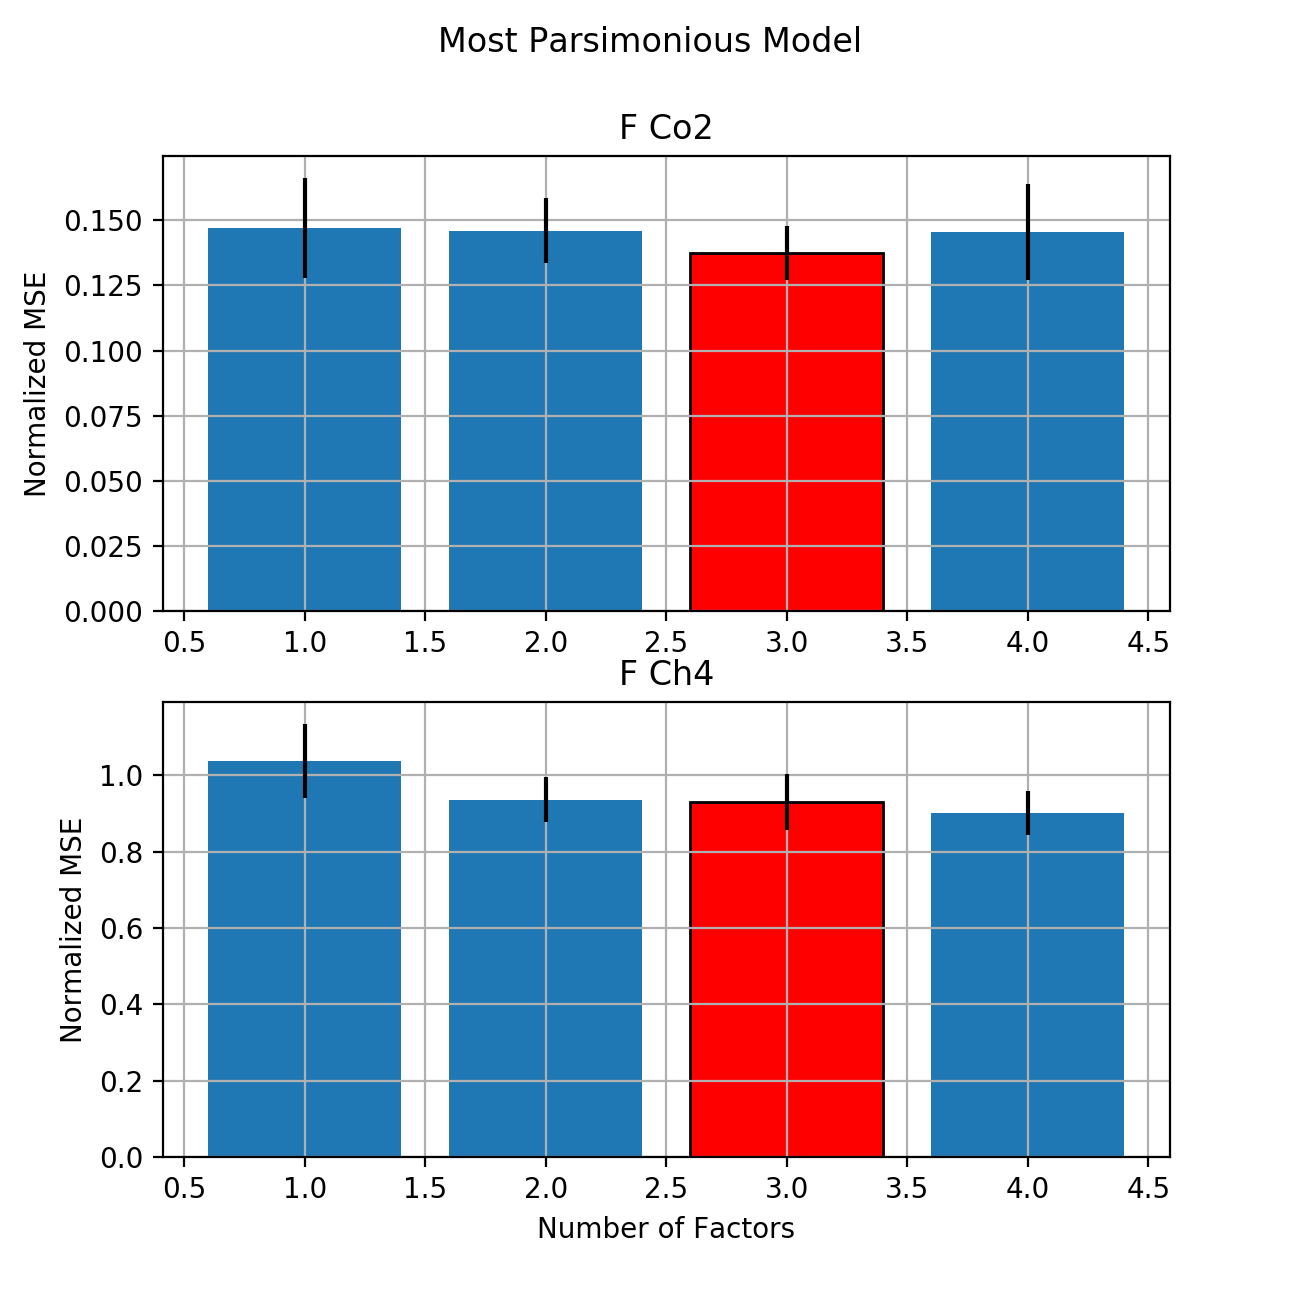

                          Model       STD       MSE        CI  Level  \
0  PPFD_Avg                      0.020149  0.147185  0.019210  1       
1  PPFD_Avg+VPD                  0.012914  0.146097  0.012312  2       
2  PPFD_Avg+AirTC_Avg+VPD        0.010883  0.137376  0.010375  3       
3  PPFD_Avg+AirTC_Avg+Shrub+VPD  0.019316  0.145474  0.018416  4       

         SE    Sig  
0  0.009011  False  
1  0.005775  False  
2  0.004867  True   
3  0.008639  False  
                          Model       STD       MSE        CI  Level  \
0  Sedge                         0.102053  1.037806  0.097296  1       
1  PPFD_Avg+Sedge                0.061439  0.935998  0.058575  2       
2  PPFD_Avg+AirTC_Avg+Sedge      0.075793  0.929910  0.072260  3       
3  PPFD_Avg+AirTC_Avg+Sedge+VPD  0.061278  0.901593  0.058422  4       

         SE    Sig  
0  0.045639  False  
1  0.027476  False  
2  0.033896  True   
3  0.027404  True   


In [23]:
fig,ax = plt.subplots(2,1,figsize=sizes)
def TTest(A,B):
    T = ((A['MSE']-B['MSE'].values)/(((A['STD']**2/30+B['STD'].values**2/30))**.5))
    df = (int(((A['STD']**2/30+B['STD'].values**2/30)**2)/((A['STD']**2/30)**2/(30-1)+(B['STD'].values**2/30)**2/(30-1))))
    if T[0] < (stats.t.ppf(1-0.05, df)):
        return(True)
    else:
        return(False)
    
def Bars(ax,Summary,title):
    Levels = Summary.groupby('Level').min()
    Sub=Summary[Summary['MSE'].isin(Levels['MSE'].values)][['Model',
                                    'STD','MSE','CI','Level','SE']]
    Sub.sort_values('Level',inplace=True)
    Sub = Sub.loc[Sub['Level']>=1]
    Sub.reset_index(inplace=True,drop=True)
    ax.bar(Sub['Level'],Sub['MSE'],yerr = Sub['CI'])
    ax.grid()
    ax.set_ylabel('Normalized MSE')
#     ax.set_ylim(0,Sub['Upper_Bounds'].max()+Sub['Upper_Bounds'].max()*.1)

#     Par_Key = 'MSE'
#     Parsimony = Sub[Sub[Par_Key] <= Sub['Upper_Bounds'].min()].min()['Level']
#     Subpar = Sub[Sub[Par_Key] <= Sub['Upper_Bounds'].min()].min()['MSE']
#     Subpar=Sub.loc[Sub['MSE'] == Subpar]
    
    ax.set_title(title)
    
    MinMod = Sub[Sub['MSE'] == Sub['MSE'].min()]
    Sub['Sig']=False
#     print()
    for i,row in Sub.iterrows():
#         print(row,MinMod)
        Sub.loc[Sub.index==i,'Sig']=TTest(row,MinMod)
    Parsimony = Sub.loc[Sub['Level'] == Sub.loc[Sub['Sig']==True,'Level'].min()]
    ax.bar(Parsimony['Level'],Parsimony['MSE'],facecolor='red',edgecolor='black')
    print(Sub)
    
#     x,y = Parsimony['Level'],Parsimony['MSE']+Parsimony['MSE']*.05
#     ax.annotate('Most Pasrimonious', xy=(x,y),  xycoords='data',
#             xytext=(x, Sub['Upper_Bounds'].max()), textcoords='data',
#             arrowprops=dict(facecolor='red', shrink=0.05),
#             horizontalalignment='center', verticalalignment='top',
#             )
plt.suptitle('Most Parsimonious Model')
ax[1].set_xlabel('Number of Factors')
Bars(ax[0],fco2_summary,'F Co2')
Bars(ax[1],fch4_summary,'F Ch4')

plt.savefig('Fig3.png')
# Sub

In [ ]:
def F1(model,Data,Fill,var,Factor=None):
    Model = 'Model: '+model
    Data['Fill']=Fill[Model] 
    if var == 'fch4':
        Units = 'nmol m$^{-2}$ s$^{-1}$'
    else:
        Units = 'umol m$^{-2}$ s$^{-1}$'
    plt.figure(figsize=sizes)
    Test = Data[[var,'Fill']].dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(Test[var],Test['Fill'])
# if Factor2 == None:
    if Factor == None:
        Factor = model
        Temp = Data[[Factor,'Fill']].sort_values(Factor)
        plt.scatter(Data[Factor],Data[var],label = 'Observations',s=10,c='black')
        plt.plot(Temp[Factor],Temp['Fill'],label = 'Modeled Flux\n'+\
                 'r${^2}$:'+str(np.round(r_value**2,2))+\
                '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units,c='red')
        Temp3 = (Data.loc[Data[Factor]<=10])
        slope, intercept, r_value, p_value, std_err = stats.linregress(Temp3[Factor],Temp3['Fill'])
        print(intercept,slope)
    else:
        plt.scatter(Data[Factor[0]],Data[var],label = 'Observations',s=10,c='black')
        plt.scatter(Data[Factor[0]],Data['Fill'],c=Data[Factor[1]],
                    cmap = plt.get_cmap('RdBu'),label = 'Modeled Flux\n'+\
                 'r${^2}$:'+str(np.round(r_value**2,2))+\
                '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units)
        plt.colorbar()
        
    plt.title(Model)
    plt.ylabel(Units)
    plt.xlabel(Factor)
    plt.grid()
    plt.legend()
    Fignum='3'
    plt.savefig('Fig'+Fignum+'.png')
# F1('PPFD_Avg',Data,fco2_fill,'fco2')
Model = 'PPFD_Avg'
F1(Model,Data,fco2_fill,'fco2')#,['PPFD_Avg','wind_speed'])
# Model = fch4_summary.loc[fch4_summary['Key']=='7_1','Model']
Model = 'Sedge'
F1(Model,Data,fch4_fill,'fch4')#,['Sedge','VWC'])


# Individual Model Performance

## Factor Effects

<IPython.core.display.Javascript object>


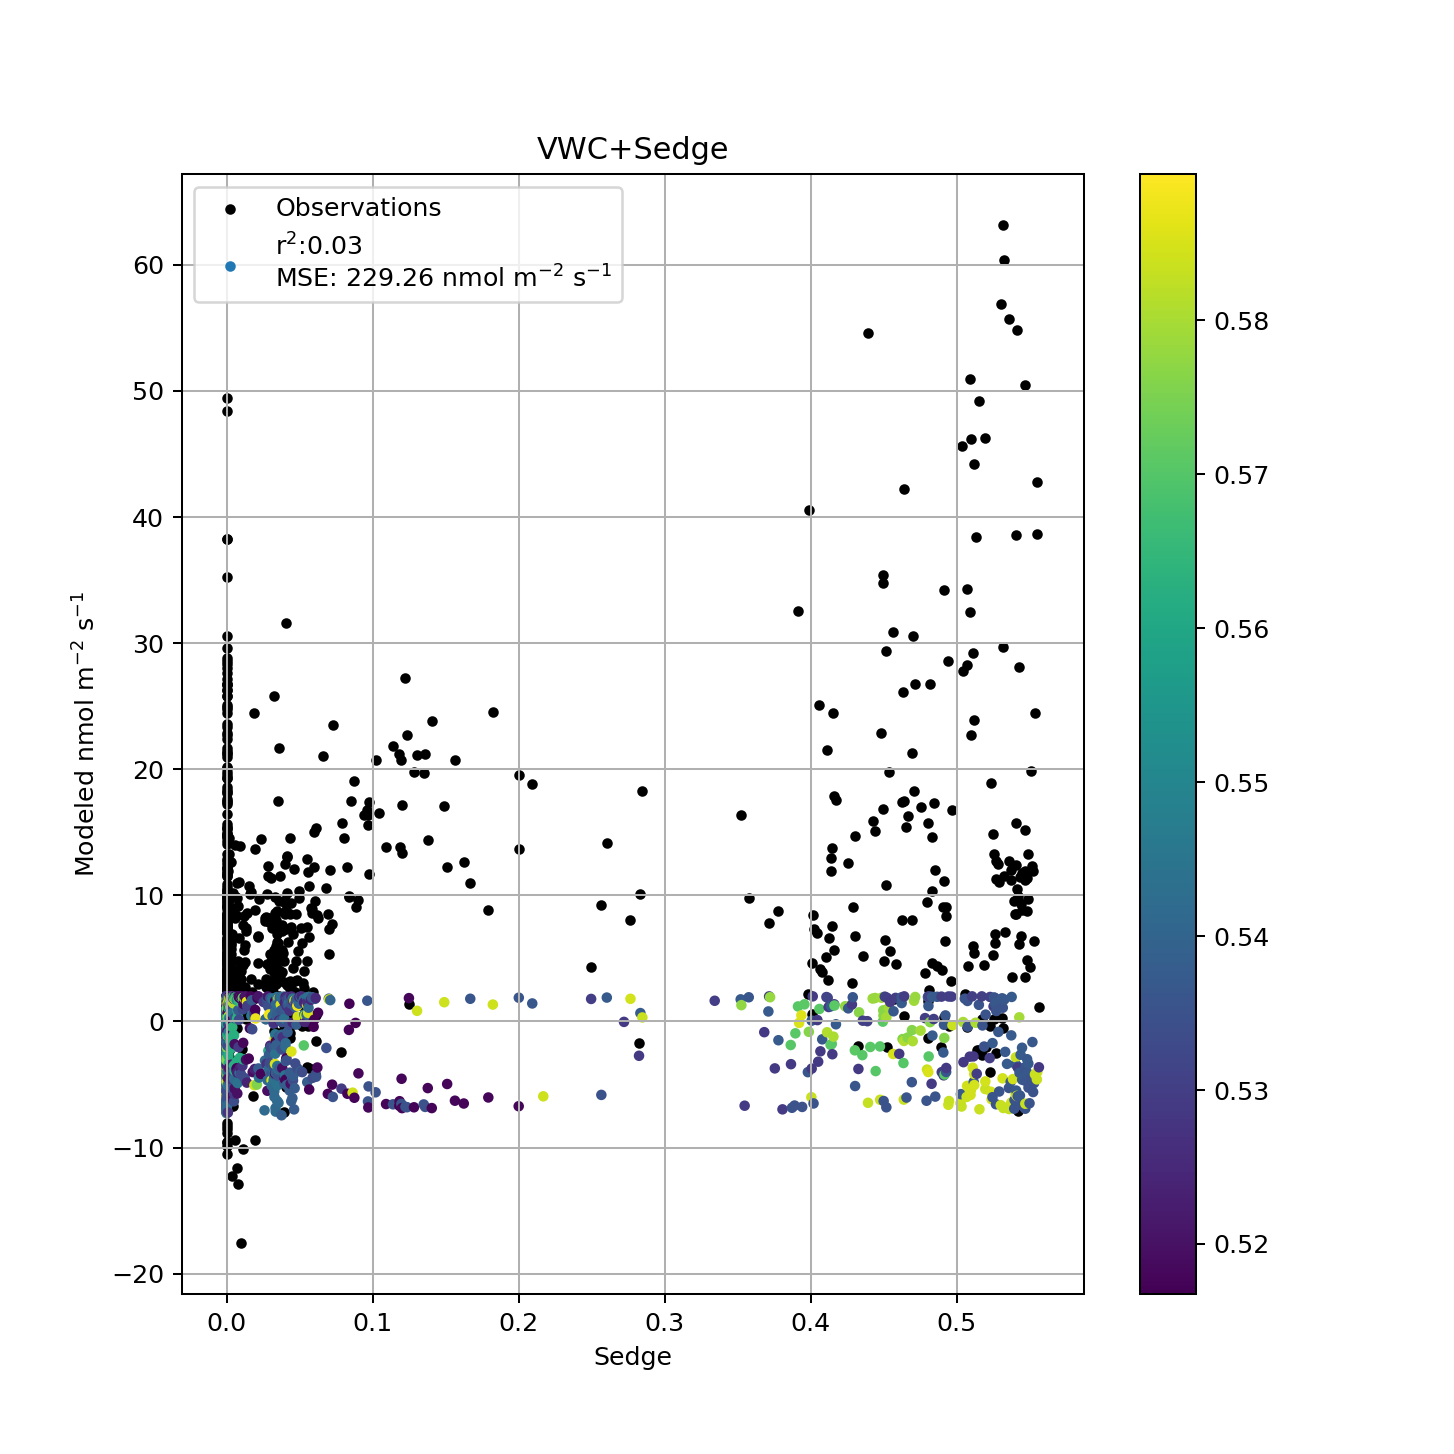

In [78]:
Factor2 = 'VWC'
Model = 'VWC+Sedge'
var ='fch4'
if len(Model.split('+'))>1:
    if var == 'fch4':
        Factor = 'Sedge'
    elif var == 'fco2':
        Factor = 'PPFD_Avg'
else:
    Factor = Model.split('Model: ')[-1]
    
plt.figure(figsize=sizes2)
Test = Data[[var,'Fill']].dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(Test[var],Test['Fill'])
if Factor2 == None:
    Temp = Data[[Factor,'Fill']].sort_values(Factor)
    
else:
    Temp = Data[[Factor,Factor2,'Fill']].sort_values(Factor)
    
plt.scatter(Data[Factor],Data[var],label = 'Observations',s=10,c='black')
if len(Model.split('+'))>1 and Factor2 != None:
    plt.scatter(Temp[Factor],Temp['Fill'],label = 'r${^2}$:'+str(np.round(r_value**2,2))+\
            '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units,
                s = 10,c=Temp[Factor2])
    plt.colorbar()
    
elif len(Model.split('+'))>1:
    plt.scatter(Temp[Factor],Temp['Fill'],label = 'r${^2}$:'+str(np.round(r_value**2,2))+\
            '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units,
                s = 10,c='red')

else:
    plt.plot(Temp[Factor],Temp['Fill'],label = 'r${^2}$:'+str(np.round(r_value**2,2))+\
            '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units,c='red')

plt.title(Model)
plt.ylabel('Modeled ' +Units)
plt.xlabel(Factor)

Line = np.arange(Data[var].min(),Data[var].max(),2)

plt.grid()
plt.legend()
Fignum='3'
plt.savefig('Fig'+Fignum+'.png')

<IPython.core.display.Javascript object>


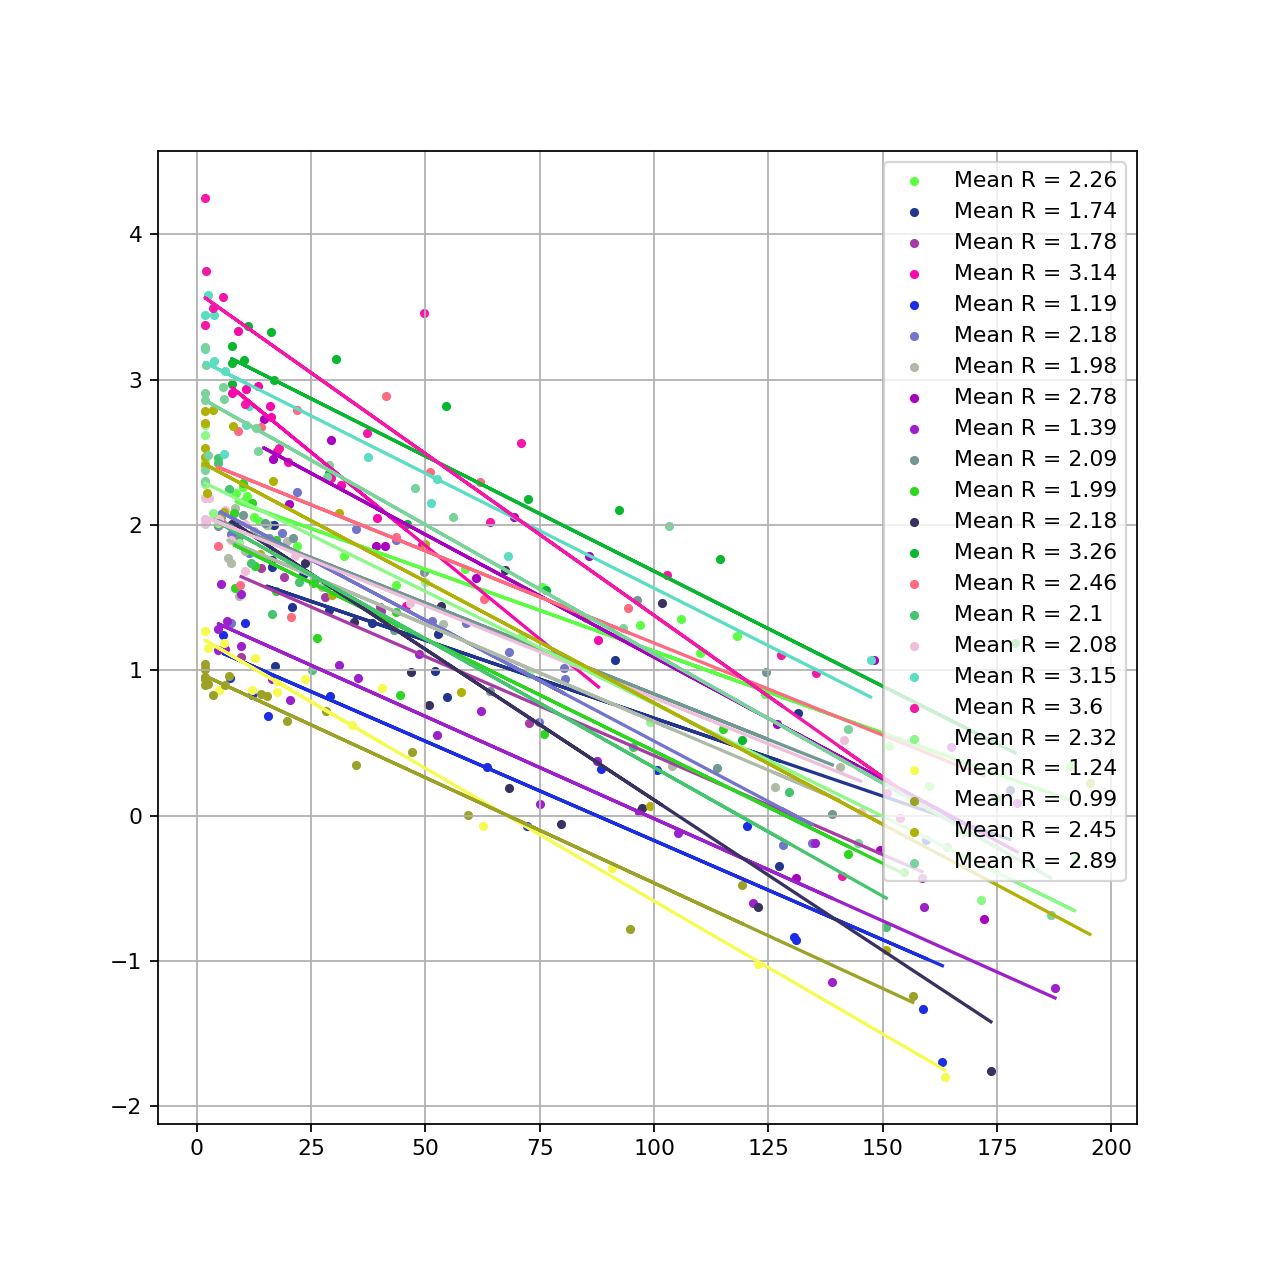

C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


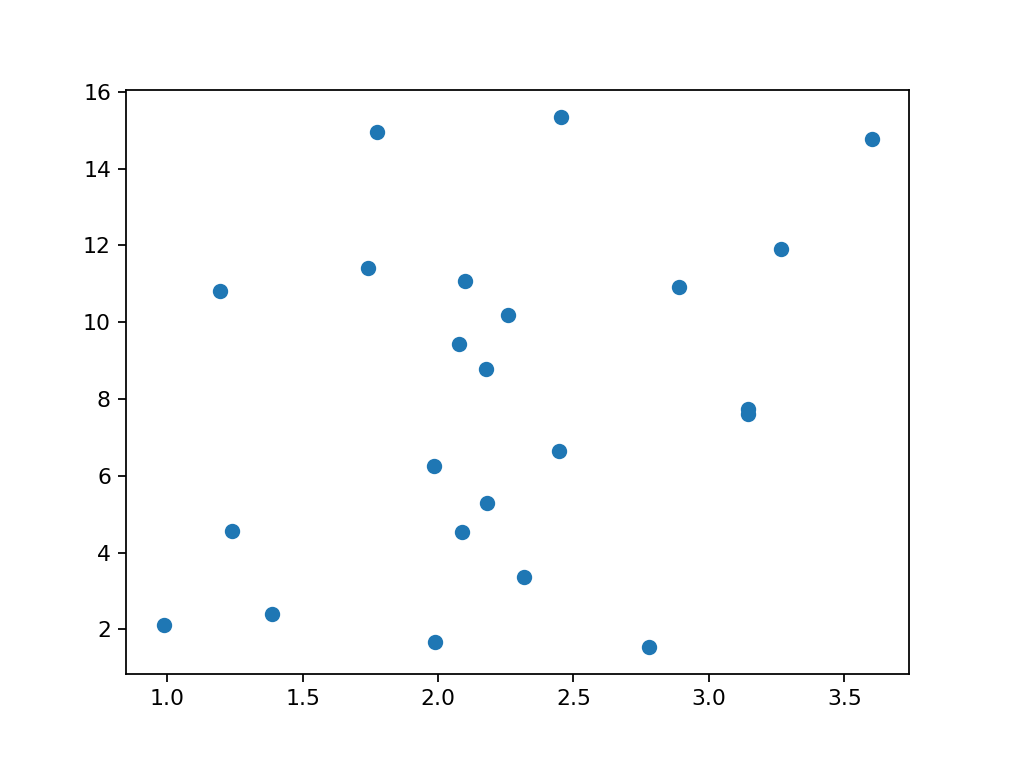

In [114]:
import datetime
from scipy.optimize import curve_fit
# print(Data)
Data['OffsetTime'] = (Data.index + datetime.timedelta(hours=12)).dayofyear
def Curve(x,a,b,c):
    return (b*x+c)
Daily = []
factor = []
thresh = 8
fig,ax = plt.subplots(figsize=(8,8))
for day in (Data['OffsetTime'].unique()):
    Temp = Data.loc[(Data['OffsetTime']==day)&(Data[Factor]<=200),[Factor,var,'Fill','AirTC_Avg','VPD']]
#     print(Temp)#,c='black')
    Temp = Temp.dropna()
    if Temp.shape[0]>=int(thresh):
        C=np.random.rand(3)
        popt, pcov = curve_fit(Curve, Temp[Factor].values, Temp['Fill'].values)
        ax.plot(Temp[Factor],Curve(Temp[Factor].values,*popt),c=C)
        ax.scatter(Temp[Factor],Temp['Fill'],s=10,c=C,
                label = 'Mean R = '+str(np.round(Curve(0,*popt),2)))
        Daily.append(Curve(0,*popt))
    else:
        Daily.append(np.nan)
    factor.append(Temp['AirTC_Avg'].median())
# plt.ylim(0,4.5)
# plt.xlim(-10,100)
plt.legend()
plt.grid()

plt.show()
fig,ax = plt.subplots()
ax.scatter(Daily,factor)

In [ ]:
# print(Data['Day'])

In [ ]:

# fig=plt.figure(figsize=(10,4))
# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis
# print(fch4_summary.loc[fch4_summary['Model']=='Temp'])
# # table(ax, df)  # where df is your data frame

# # new_cols = Data.columns.values
# # new_cols[:2] = '',''  # since my index columns are the two left-most on the table
# # df.columns = new_cols 
# tab = Sub[['Model','MSE','CI']].round(2)
# table(ax, tab, rowLabels=['']*tab.shape[0], loc='center')
# plt.savefig('mytable.png')



#     sizes2 = (8,8)
#     plt.figure(figsize=sizes)
#     Data['Fill']=Fill[Model] 
#     Test = Data[[var,'Fill']].dropna()
#     slope, intercept, r_value, p_value, std_err = stats.linregress(Test[var],Test['Fill'])
#     plt.scatter(Data[var],Data['Fill'],label = 'r${^2}$:'+str(np.round(r_value**2,2))+\
#                 '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units,s=10)
#     plt.title(Model)
#     plt.ylabel('Modeled ' +Units)
#     plt.xlabel('Observations ' +Units)
#     xl = plt.xlim()
#     plt.ylim(xl)

#     Line = np.arange(Data[var].min(),Data[var].max(),2)

#     plt.plot(Line,Line,label = '1:1',color ='black')
#     plt.plot(Line,Line*slope+intercept,label = 'Best Fit Line',color ='red')

#     plt.grid()
#     plt.legend()
    